<a href="https://colab.research.google.com/github/Wenjie0o0/ClassAI/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_classes = 10
batch_size = 64
learning_rate = 1e-4 #0.0001
epochs=10


train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



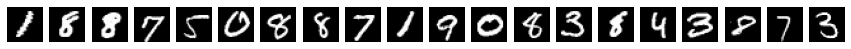

In [2]:
iterator=iter(train_loader)
images,labels=next(iterator)
fig,axes=plt.subplots(1,20,figsize=(15,15))
for i in range(20):
  axes[i].imshow(images[i][0],cmap='gray')
  axes[i].set_axis_off()
fig.show()

In [3]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    self.encoder=encoder
    self.decoder=decoder
  def forward(self,x):
    x=self.encoder(x)
    output=self.decoder(x)
    return output

In [4]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=16,out_channels=4,kernel_size=3,stride=1,padding=1)
    self.pool=nn.MaxPool2d(2,2)
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=self.pool(x)
    x=F.relu(self.conv2(x))
    output=self.pool(x)
    return output

In [5]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.conv_t1=nn.ConvTranspose2d(in_channels=4,out_channels=16,kernel_size=4,stride=2,padding=1)
    self.conv_t2=nn.ConvTranspose2d(in_channels=16,out_channels=1,kernel_size=4,stride=2,padding=1)
  def forward(self,x):
    x=F.relu(self.conv_t1(x))
    output=torch.sigmoid(self.conv_t2(x))
    return output

In [6]:
encoder=Encoder()
decoder=Decoder()
ae=Autoencoder().to(device)

In [7]:
print(ae)

Autoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (conv_t1): ConvTranspose2d(4, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv_t2): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)


In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=learning_rate)

In [9]:
total_steps = len(train_loader)
for epoch in tqdm(range(epochs)):
  train_loss=0.0
  for i, (images, _) in enumerate(train_loader):
    # origin shape: [64, 3, 224, 224]
    images = images.to(device)
    
    # Forward pass
    
    outputs = ae(images)
    loss = criterion(outputs, images)
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()
  print (f'Epoch [{epoch+1}],  Loss: {train_loss/total_steps:.4f}')

 10%|█         | 1/10 [00:15<02:15, 15.09s/it]

Epoch [1],  Loss: 0.1136


 20%|██        | 2/10 [00:22<01:22, 10.29s/it]

Epoch [2],  Loss: 0.0371


 30%|███       | 3/10 [00:28<01:01,  8.76s/it]

Epoch [3],  Loss: 0.0187


 40%|████      | 4/10 [00:35<00:48,  8.02s/it]

Epoch [4],  Loss: 0.0143


 50%|█████     | 5/10 [00:42<00:38,  7.61s/it]

Epoch [5],  Loss: 0.0128


 60%|██████    | 6/10 [00:49<00:29,  7.37s/it]

Epoch [6],  Loss: 0.0119


 70%|███████   | 7/10 [00:57<00:22,  7.37s/it]

Epoch [7],  Loss: 0.0111


 80%|████████  | 8/10 [01:03<00:14,  7.21s/it]

Epoch [8],  Loss: 0.0106


 90%|█████████ | 9/10 [01:10<00:07,  7.10s/it]

Epoch [9],  Loss: 0.0101


100%|██████████| 10/10 [01:17<00:00,  7.76s/it]

Epoch [10],  Loss: 0.0098


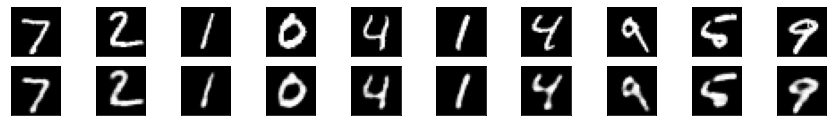

In [11]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device)
output = ae(images)
images = images.cpu().numpy()
output = output.detach().cpu().numpy()


fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(15,2))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)